In [4]:
from dynamics.robot_selector import robot_selector
import numpy as np
from dynamics.data_gen_robot import data_gen_robot, data_gen_robot_multi
import matplotlib.pyplot as plt

In [5]:
robot_name = "3R_2D"
params_incor = {}
params_incor['m'] = 1
params_incor['I'] = np.eye(3)
params_incor['l'] = 0.33

params_cor = {}
params_cor['m'] = 3
params_cor['I'] = 1.5*np.eye(3)
params_cor['l'] = 0.6

robot_cor = robot_selector(robot_name, params_cor)
robot_incor = robot_selector(robot_name, params_incor)

In [6]:
print(robot_cor, robot_incor)

DHRobot: 3R_2D, 3 joints (RRR), dynamics, standard DH parameters
┌────┬────┬─────┬──────┐
│θⱼ  │ dⱼ │ aⱼ  │  ⍺ⱼ  │
├────┼────┼─────┼──────┤
│ q1 │  0 │ 0.6 │ 0.0° │
│ q2 │  0 │ 0.6 │ 0.0° │
│ q3 │  0 │ 0.6 │ 0.0° │
└────┴────┴─────┴──────┘

┌─┬──┐
└─┴──┘
 DHRobot: 3R_2D, 3 joints (RRR), dynamics, standard DH parameters
┌────┬────┬──────┬──────┐
│θⱼ  │ dⱼ │  aⱼ  │  ⍺ⱼ  │
├────┼────┼──────┼──────┤
│ q1 │  0 │ 0.33 │ 0.0° │
│ q2 │  0 │ 0.33 │ 0.0° │
│ q3 │  0 │ 0.33 │ 0.0° │
└────┴────┴──────┴──────┘

┌─┬──┐
└─┴──┘



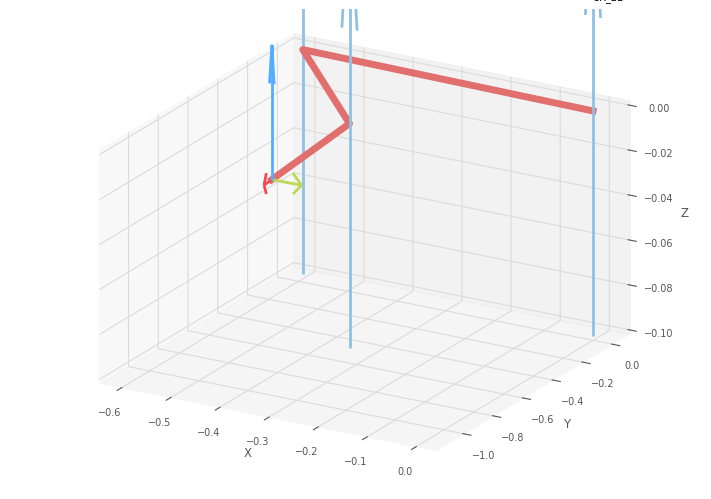

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.042359523986619095, 0.019698918375812436, '3R_2D')

<Figure size 640x480 with 0 Axes>

In [7]:
q = robot_cor.random_q()
robot_cor.plot(q)

In [8]:
num_traj = 200
num_snaps = 1000
dt = 0.005
controller = 'controller'
num_states = robot_incor.random_q().shape[0]
num_inputs = num_states

if robot_incor.name.__contains__("2D"):
    num_states_cart = 2
else:
    num_states_cart = 3
T = np.linspace(0,num_snaps*dt,num_snaps)

In [9]:
X_end_cor, X_cor, X_end_incor, X_incor, U = data_gen_robot_multi(dt,num_traj,num_snaps, robot_cor, robot_incor, controller)

In [10]:
print(sum(sum(sum(np.isnan(X_cor)))))
print(sum(sum(sum(np.isnan(X_incor)))))

0
0


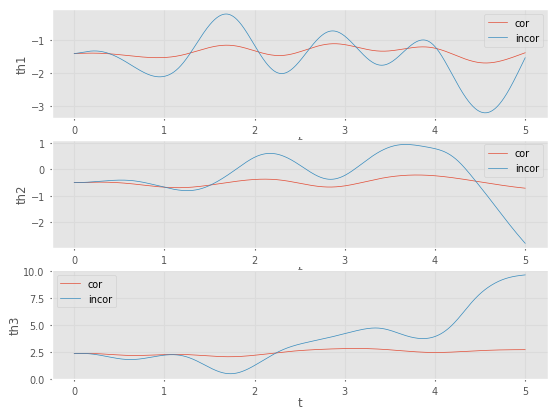

In [11]:
j = 20
for i in range(int(num_states)):
    plt.subplot(num_states,1,i+1)
    plt.xlabel("t")
    plt.ylabel("th"+str(i+1))
    plt.plot(T,X_cor[j,:,i], label ="cor")
    plt.plot(T,X_incor[j,:,i], label = "incor")
    plt.legend()

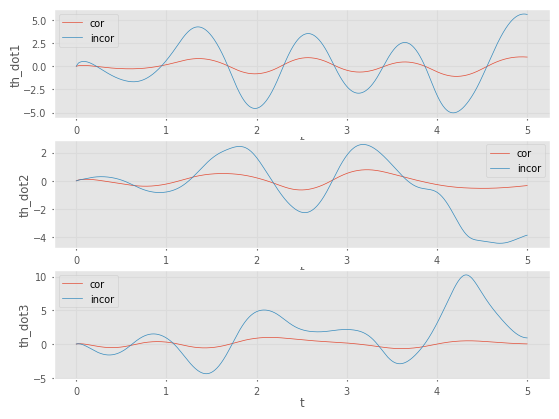

In [12]:

for i in range(int(num_states)):
    plt.subplot(num_states,1,i+1)
    plt.xlabel("t")
    plt.ylabel("th_dot"+str(i+1))
    plt.plot(T,X_cor[j,:,num_states+i], label = "cor")
    plt.plot(T,X_incor[j,:,num_states+i], label = "incor")
    plt.legend()

ValueError: x and y must have same first dimension, but have shapes (1000,) and (999,)

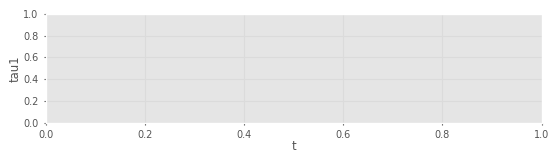

In [13]:

for i in range(int(num_states)):
    plt.subplot(num_states,1,i+1)
    plt.xlabel("t")
    plt.ylabel("tau"+str(i+1))
    plt.plot(T,U[j,:,i])

In [15]:
robot_cor.jacob0(robot_cor.random_q())[:3,:]

array([[1.03844085, 0.66227426, 0.13272942],
       [0.77047011, 0.30303166, 0.58513494],
       [0.        , 0.        , 0.        ]])